## SPP Net(Spatial Pyramid Pooling Network)


### 정의

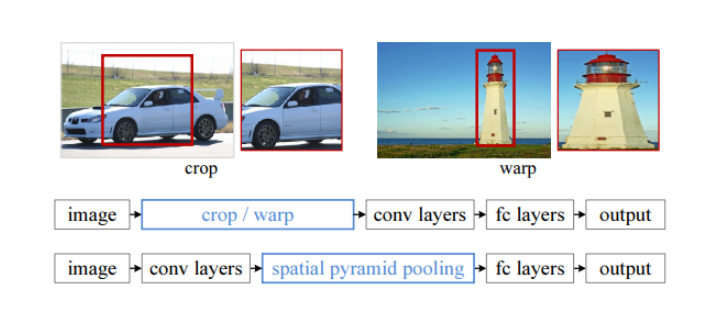

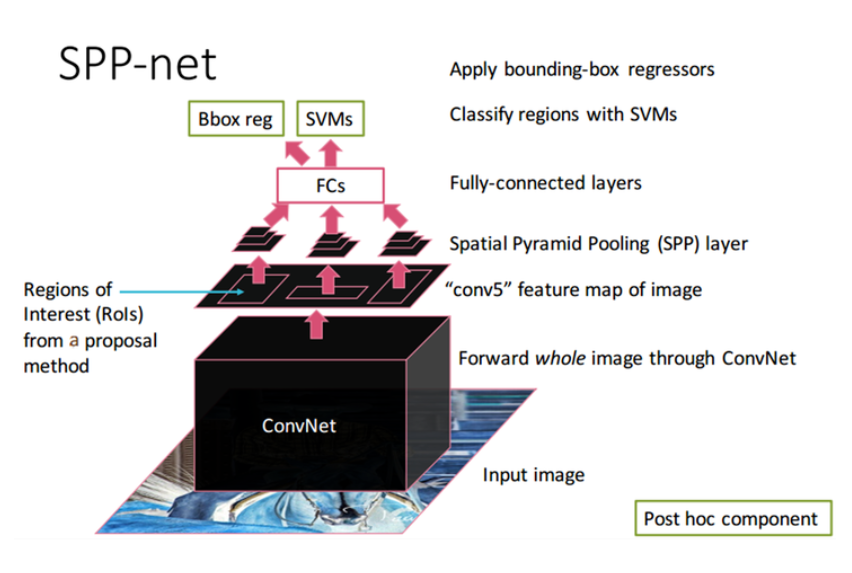

기존의 RCNN은 모두 입력 이미지가 고정되어야만 했다. 그렇기 때문에 신경망을 통과시키기 위해서는 이미지를 고정된 크기로 크롭하거나 비율 조정을 해야한다. 그렇게 되면 물체의 일부분이 잘리거나, 본래의 생김새와 달라진다는 문제점이 있고, RCNN은 이미지 각각을 Convolution 연산함으로써 속도도 느려진다는 단점이 있어  고정된 임의 크기의 입력을 받는 Spatial Pyramid Pooling을 사용하기 시작했다.

### **전체 알고리즘 실행 순서**

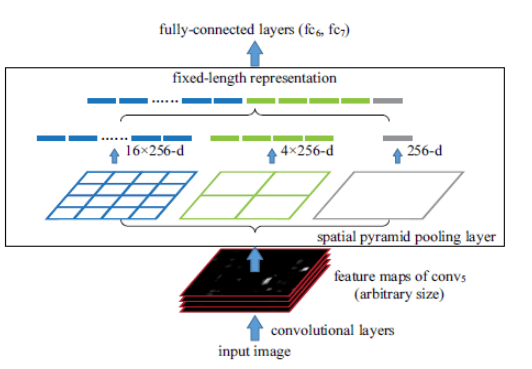

1. 먼저 전체 이미지를 미리 학습된 CNN을 통과시켜 피쳐맵을 추출한다.

2. Selective Search를 통해서 찾은 각각의 RoI들은 제 각기 크기와 비율이 다르다.

   이에 SPP를 적용하여 고정된 크기의 feature vector를 추출한다.


> (이때 Selective Search는 Input image 에서 한다)

✅ 디테일 설명
*   4 $\times$ 4,  2 $\times$ 2,  1 $\times$ 1 세가지 영역으로 나누고 이것을 하나의 피라미드라고 한다


*  어떤 이미지가 들어 와도 분할영역이 16,4,1로 고정이 되어 있어, 영역의 개수는 21개로 고정이 되어 있다.
*   16, 4, 1로 나눈 값에서 가장 큰 값만 추출하는 max pooling을 수행하고, 그 결과를 쭉 이어붙여 준다
*   입력 피쳐맵의 채널 크기를 k, bin의 개수를 M이라고 할 때 SPP의 최종 아웃풋은 채널과 bin개수의 벡터가 나온다
입력 이미지의 크기와 상관없이 미리 설정한 bin의 개수와 CNN 채널 값으로 SSP의 출력이 결정됨으로 항상 동일한 크기의 결과를 리턴한다.

3. 그 다음 fully connected layer들을 통과 시킨다

4. 앞서 추출한 벡터로 각 이미지 클래스 별로 binary SVM(Support Vector Machines) Classifier를 학습시킨다

5. 마찬가지로 앞서 추출한 벡터로 bounding box regressor를 학습시킨다

✅ Full connective Layer의 한계 극복 방법

 **공간정보의 손실 방지**

Bag of Word는 특정 영역에 대해 이미지의 주요 feature들을 뽑아내는 기법인데 지역정보가 손실된다는 단점이 있다. 하지만 이미지를 n등분 시킨 뒤 각각에 BOW를 적용하게 되면 지역정보가 어느 정도 보존되게 되고, 피라미드꼴로 구성한것을 Spatial Pyramid라고 한다.





# Bag of Word

# Spatial Pyramid Matching

# Efficient Subwindow Search

### SPP-Net을 Object Detection에 적용

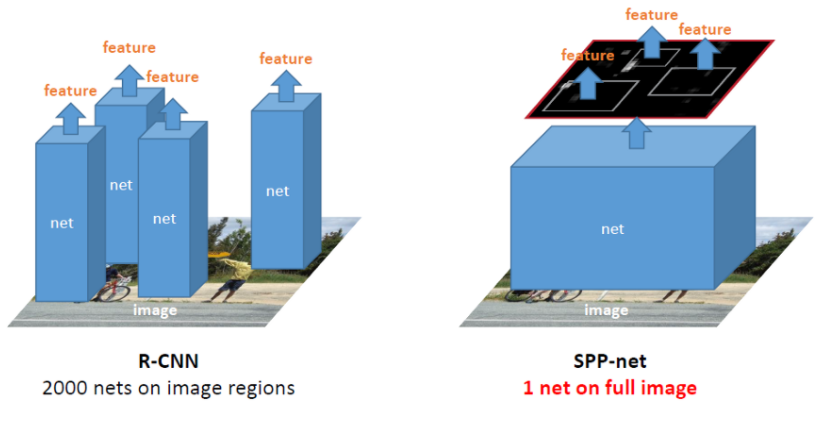




*   RCNN은 경우에는 selective search로 찾은 약 2천개의 물체 영역(RoI)을 모두 고정 크기로 조절한 다음, 미리 학습된 CNN을 통과 시켜 Feature를 추출하기 때문에 속도가 느려 질 수 밖에 없다. 

*   SPP Net 경우는 입력 이미지를 그대로 CNN에 통과시켜 피쳐맵을 추출한 다음,
그 feature map에서 2천개의 물체 영역을 찾아 SPP를 적용하여 고정된 크기의 Feature를 얻어 FC와 SVM Classifier에 통과 시킨다 


### SPP의 한계점



*   end-to-end 방식이 아니라 학습에 여러 단계가 필요하다.
*   여전히 최증 클래시피케이션은 binary SVM, Region Proposal은 Selectiver Search를 이용한다.
*   fine tuning시에 SPP를 거치기 이전의 Conv레이어들을 학습 시키지 못하고, 그 뒤에 Fully Connected Layer만 학습시킨다.









### 참조 [1](https://yeomko.tistory.com/14)